In [82]:
import time
start = time.time()

In [83]:
import os
import cv2
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.metrics
from keras.models import Sequential
from keras.layers import Flatten, MaxPooling2D, Conv2D, Dense
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

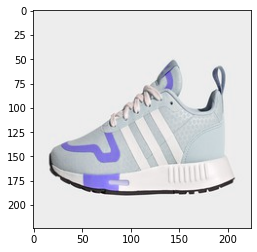

In [84]:
img_array = cv2.imread('/content/drive/MyDrive/archive (1)/test/adidas/Adidas (18).jpg')
# img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.show()

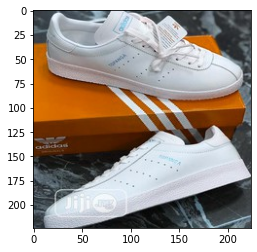

In [85]:
data = '/content/drive/MyDrive/archive (1)/train'
categories = ['adidas','nike']
# For test our create_data function will be work
for ct in categories:
  path = os.path.join(data,ct)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    # img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break

In [86]:
print(img_array.shape)

(224, 224, 3)


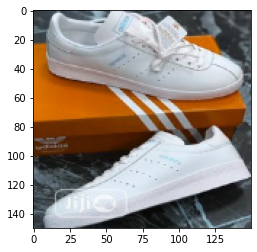

In [87]:
IMG_Size = 150
new_array = cv2.resize(img_array, (IMG_Size,IMG_Size))
plt.imshow(new_array)
plt.show()

In [88]:
training_data = []
test_data = []
val_data = []

def create_data(my_data_path,my_data):
    for ct in categories:
      path = os.path.join(my_data_path,ct)
      class_num = categories.index(ct)
      for img in os.listdir(path):
        datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./225)
        generator = datagen.flow_from_directory(my_data_path, shuffle=True, batch_size=32)
        try:
          img_array = cv2.imread(os.path.join(path,img))
          # img_array = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
          new_array = cv2.resize(img_array, (IMG_Size,IMG_Size))
          my_data.append([new_array,class_num])
        except Exception as e:
          pass

In [ ]:
test_data_path = '/content/drive/MyDrive/archive (1)/test'
train_data_path = '/content/drive/MyDrive/archive (1)/test'
val_data_path = '/content/drive/MyDrive/archive (1)/validation'
create_data(train_data_path,training_data)
create_data(test_data_path,test_data)
create_data(val_data_path,val_data)

In [90]:
random.shuffle(training_data)
random.shuffle(test_data)

for sample in training_data[:10]:  # For test shuflle
  print(sample[1])

1
0
1
0
0
1
1
0
1
0


In [91]:
x = []
y = []

for features, label in training_data:
  x.append(features)
  y.append(label)

x_test = []
y_test = []

for features, label in test_data:
  x_test.append(features)
  y_test.append(label)

x_val = []
y_val = []

for features, label in val_data:
  x_val.append(features)
  y_val.append(label)

In [92]:
x = np.array(x)
x_test = np.array(x_test)
x_val = np.array(x_val)
y = np.array(y)
y_test = np.array(y_test)
y_val = np.array(y_val)

In [93]:
x.shape,y.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((60, 150, 150, 3), (60,), (60, 150, 150, 3), (60,), (55, 150, 150, 3), (55,))

In [94]:
x = np.array(x).reshape(-1, IMG_Size, IMG_Size, 3)
x_test = np.array(x_test).reshape(-1, IMG_Size, IMG_Size, 3)
x_val = np.array(x_val).reshape(-1, IMG_Size, IMG_Size, 3)

In [95]:
x.shape,y.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((60, 150, 150, 3), (60,), (60, 150, 150, 3), (60,), (55, 150, 150, 3), (55,))

In [97]:
y = y.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y)
enc.fit(y_test)
enc.fit(y_val)

In [99]:
x.shape,y.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape

((60, 150, 150, 3),
 (60, 1),
 (60, 150, 150, 3),
 (60, 1),
 (55, 150, 150, 3),
 (55, 1))

In [100]:
best_model = ModelCheckpoint('/content/drive/MyDrive/bestmodel.hdf5', monitor='accuracy', save_best_only=True)
best_val_acc = ModelCheckpoint('/content/drive/MyDrive/best_val_acc.hdf5', monitor='val_accuracy', save_best_only=True)

In [105]:
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=(150, 150, 3) , activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(.2))
model.add(Dense(6, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy', # binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy
    optimizer=opt,
    run_eagerly=True,
    metrics=['accuracy']
)

hist = model.fit(x, y, validation_data=(x_val,y_val), verbose=2, epochs=20, shuffle=True, callbacks=[best_model, best_val_acc])

Epoch 1/20
2/2 - 35s - loss: 575.5352 - accuracy: 0.2500 - val_loss: 1714.5830 - val_accuracy: 0.5091 - 35s/epoch - 18s/step
Epoch 2/20
2/2 - 32s - loss: 954.5818 - accuracy: 0.5000 - val_loss: 45.8089 - val_accuracy: 0.4909 - 32s/epoch - 16s/step
Epoch 3/20
2/2 - 35s - loss: 33.4230 - accuracy: 0.5167 - val_loss: 6.2965 - val_accuracy: 0.5091 - 35s/epoch - 17s/step
Epoch 4/20
2/2 - 34s - loss: 3.0799 - accuracy: 0.6667 - val_loss: 0.8517 - val_accuracy: 0.4545 - 34s/epoch - 17s/step
Epoch 5/20
2/2 - 46s - loss: 1.1580 - accuracy: 0.7333 - val_loss: 1.1766 - val_accuracy: 0.6727 - 46s/epoch - 23s/step
Epoch 6/20
2/2 - 37s - loss: 0.7841 - accuracy: 0.8167 - val_loss: 3.7669 - val_accuracy: 0.5455 - 37s/epoch - 19s/step
Epoch 7/20
2/2 - 28s - loss: 1.1789 - accuracy: 0.7667 - val_loss: 3.3433 - val_accuracy: 0.4909 - 28s/epoch - 14s/step
Epoch 8/20
2/2 - 32s - loss: 2.0127 - accuracy: 0.8000 - val_loss: 2.1312 - val_accuracy: 0.6182 - 32s/epoch - 16s/step
Epoch 9/20
2/2 - 34s - loss: 0.

In [106]:
hist.history??

In [120]:
def visualization(name,h,color):
  t = h.history[name]
  my_max = max(t)
  my_min = min(t)
  print(f'Name : {name:10} max : {my_max:10} min : {my_min:10}')
  plt.plot(t,color=color,linewidth=3.0)
  plt.title(name)
  plt.ylabel(name)
  plt.xlabel('Epoch')
  plt.legend([name],loc='upper left')
  plt.show()

Name : accuracy   max :        1.0 min :       0.25


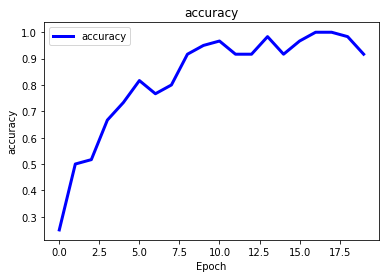

Name : loss       max : 954.581787109375 min : 0.03665284439921379


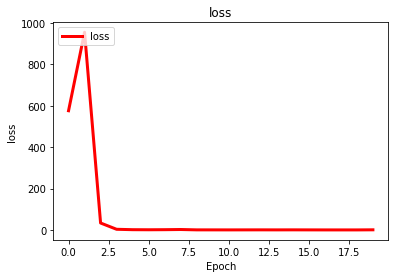

Name : val_accuracy max : 0.6727272868156433 min : 0.4545454680919647


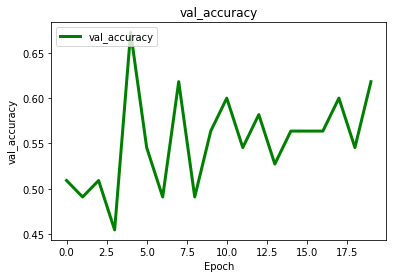

Name : val_loss   max : 1714.5830078125 min : 0.8516834378242493


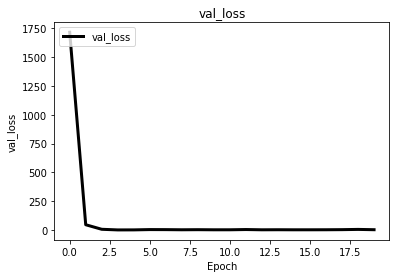

In [121]:
visualization('accuracy',hist,'Blue')
visualization('loss',hist,'Red')
visualization('val_accuracy',hist,'Green')
visualization('val_loss',hist,'Black')

In [122]:
model.load_weights('/content/drive/MyDrive/bestmodel.hdf5')
res = model.evaluate(x_test, y_test)
print("test loss, test acc:", res)

2/2 [==============================] - 5s 2s/step - loss: 0.0461 - accuracy: 1.0000
test loss, test acc: [0.04606626182794571, 1.0]


In [123]:
model.load_weights('/content/drive/MyDrive/best_val_acc.hdf5')
res = model.evaluate(x_test, y_test)
print("test loss, test acc:", res)

2/2 [==============================] - 5s 2s/step - loss: 0.6011 - accuracy: 0.9500
test loss, test acc: [0.6010614633560181, 0.949999988079071]


In [124]:
def my_predict(my_model,my_x_test):
  y_pred = my_model.predict(my_x_test)
  return y_pred

def my_f1_score(my_y_test,my_y_pred):
  f1 = f1_score(my_y_test, my_y_pred, average="micro")
  return f1

def my_conf_matrix(my_y_test,my_y_pred):
  cm = confusion_matrix(my_y_test, my_y_pred)
  cm_norm = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)
  sns.heatmap(cm_norm,cmap='Greens',annot=True,
              cbar_kws={'orientation' : 'vertical','label' : 'Color bar'},
              fmt='.2f'
              )
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()
  # cm_display = ConfusionMatrixDisplay(cm)
  # cm_display.plot()
  # plt.show()

In [125]:
y_pred_res = my_predict(model,x_test)
y_pred_res = np.argmax(y_pred_res, axis=-1)

In [126]:
y_pred_res.shape,y_test.shape

((60,), (60, 1))

In [127]:
print(my_f1_score(y_test,y_pred_res))

0.9500000000000001


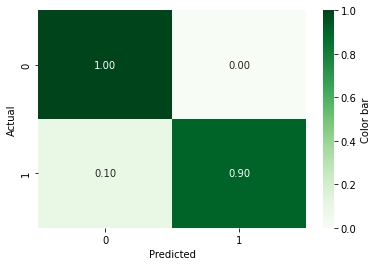

In [128]:
my_conf_matrix(y_test,y_pred_res)

In [129]:
newpath = r'/content/drive/MyDrive/Model' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [130]:
import pickle
# To save model  || You can use tensorflow model.save
pickle_out = open('/content/drive/MyDrive/Model/model.pickle','wb')
pickle.dump(model,pickle_out)
pickle_out.close()

In [131]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 256)       295168    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 36, 36, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 256)       590080    
                                                                 
 flatten_9 (Flatten)         (None, 295936)           

In [132]:
end = time.time()
print((end - start)/60)

30.865265921751657


In [133]:
# For load model
pickle_in = open('/content/drive/MyDrive/Model/model.pickle','rb')
model = pickle.load(pickle_in)